# Find Species-Level Images of Tree Genera from AutoArborist by Reconciling Locations of City Tree Inventories

In [40]:
# Libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
import os
import matplotlib.pyplot as plt
from PIL import Image

# Read in Species-Rectified AutoArborist Dataset

From Github: https://github.com/ncsu-landscape-dynamics/gsv_host_detector/tree/main/tree_inventory


In [41]:
# The AutoArborist dataset contains genus-level images and locations. 
# This data was merged to city tree inventories with species-level location data by latitude/ longitude
aa_data = pd.read_csv(r"G:/Shared drives/host_tree_cnn/merging_autoarborist_w_inventories/autoarborist_names_appended/AutoArboristData.csv", low_memory=False)
aa_data.head()

,Index,IDX,SHAPE_LNG,SHAPE_LAT,GENUS,TAXONOMY_ID,location,type,Tree ID,Tree Location IDX,...,rounded_lng,Genus,Genus Label,Capture Time Street Img,Tree Center X Street Img,Tree Center Y Street Img,original_lat,original_lng,genus_name,species_name
0,0,077b8586-1f14-11ec-81f2-eb8801c6f8d0,-86.532817,39.159436,cornus,83,Bloomington,train,8565243926414771871,077b8586-1f14-11ec-81f2-eb8801c6f8d0,...,-86.53281,cornus,83,May 2019,257,576,39.159436,-86.532817,cornus,florida
1,1,077b8694-1f14-11ec-81f2-eb8801c6f8d0,-86.532962,39.159282,cornus,83,Bloomington,train,895590795344673619,077b8694-1f14-11ec-81f2-eb8801c6f8d0,...,-86.53296,cornus,83,May 2019,387,576,39.159282,-86.532962,cornus,florida
2,2,077b877a-1f14-11ec-81f2-eb8801c6f8d0,-86.531563,39.159272,cornus,83,Bloomington,train,8300956921542110556,077b877a-1f14-11ec-81f2-eb8801c6f8d0,...,-86.53156,cornus,83,May 2019,313,576,39.159272,-86.531563,cornus,florida
3,3,077b8842-1f14-11ec-81f2-eb8801c6f8d0,-86.531343,39.159279,juniperus,156,Bloomington,train,2921012368023539546,077b8842-1f14-11ec-81f2-eb8801c6f8d0,...,-86.53134,juniperus,156,May 2019,521,576,39.159279,-86.531343,juniperus,virginiana
4,4,077b8900-1f14-11ec-81f2-eb8801c6f8d0,-86.530603,39.159408,quercus,247,Bloomington,train,11472771202647275742,077b8900-1f14-11ec-81f2-eb8801c6f8d0,...,-86.53060,quercus,247,May 2019,253,576,39.159408,-86.530603,quercus,rubra


# Summarize Data by Genus

# What proportion of AutoArborist Records Match Tree Inventories?

In [42]:

# For each genus in the 'GENUS' column from AutoArborist,
# How often does the 'GENUS' match the 'genus_name' column from the tree inventories?

# Match 'GENUS' and 'genus_name' columns by string
aa_data['match'] = aa_data['GENUS'].str.lower() == aa_data['genus_name'].str.lower()


# Calculate the proportion of matches per genus
# How often does the 'GENUS' match the 'genus_name' column from the tree inventories?
match_summary = aa_data.groupby('GENUS').agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)

# Calculate proportion of matching columns and filter
match_summary['match_proportion'] = match_summary['match_count'] / match_summary['total_records']
match_summary = match_summary[match_summary['total_records'] >= 500]

# Display the summary
match_summary.reset_index(inplace=True)
match_summary


,GENUS,total_records,match_count,match_proportion
0,abies,748,588,0.786096
1,acacia,9647,6752,0.699907
2,acer,77647,73013,0.940320
3,aesculus,7102,6569,0.924951
4,afrocarpus,2547,2483,0.974872
5,agonis,1113,966,0.867925
6,ailanthus,3266,3032,0.928353
7,albizia,915,892,0.974863
8,alnus,1973,1770,0.897111
9,amelanchier,11027,6203,0.562528


# Summarize Data by Genus and City

# What proportion of AutoArborist Records Match Tree Inventories?

In [43]:
# Summarize Data - Proportion of Matches between Autoarborist and Tree Inventories for Genera and Cities

match_summary_city_genus = aa_data.groupby(['City', 'GENUS']).agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)
match_summary_city_genus['match_proportion'] = match_summary_city_genus['match_count'] / match_summary_city_genus['total_records']

# Filter out rows with less than 500 total_records
match_summary_city_genus = match_summary_city_genus[match_summary_city_genus['total_records'] >= 500]

# Sort by match_proportion in descending order
match_summary_city_genus = match_summary_city_genus.sort_values(by='match_proportion', ascending=False).reset_index()

print(match_summary_city_genus[match_summary_city_genus['GENUS'] == 'acer'])

             City GENUS  total_records  match_count  match_proportion
53     Pittsburgh  acer           4357         4353          0.999082
85         Surrey  acer           4870         4853          0.996509
122       Boulder  acer           3283         3257          0.992080
143      Montreal  acer           6098         6023          0.987701
147     Cambridge  acer           4503         4442          0.986453
166   Bloomington  acer           1035         1014          0.979710
177    SiouxFalls  acer           6537         6377          0.975524
182    LosAngeles  acer          10355        10083          0.973732
188       Buffalo  acer           8405         8168          0.971802
192       Seattle  acer           6704         6505          0.970316
218        Denver  acer           3844         3673          0.955515
225       Calgary  acer            963          916          0.951194
274       NewYork  acer           3991         3593          0.900276
276  WashingtonDc  a

In [44]:
# Summarize Data - Proportion of Matches between Autoarborist and Tree Inventories for Genera and Cities

match_summary_city_genus = aa_data.groupby(['City', 'GENUS']).agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)
match_summary_city_genus['match_proportion'] = match_summary_city_genus['match_count'] / match_summary_city_genus['total_records']

# Filter out rows with less than 500 total_records
match_summary_city_genus = match_summary_city_genus[match_summary_city_genus['total_records'] >= 500]

# Sort by match_proportion in descending order
match_summary_city_genus = match_summary_city_genus.sort_values(by='match_proportion', ascending=False).reset_index()

print(match_summary_city_genus[match_summary_city_genus['GENUS'] == 'juglans'])

           City    GENUS  total_records  match_count  match_proportion
126  LosAngeles  juglans           1872         1856          0.991453


# Filter images of Acer by Species

In [45]:

# Filter AutoArborist by 'GENUS' column reported in AutoArborist
acer_data = aa_data[aa_data['GENUS'].str.lower() == 'acer']

# Filter Tree Inventory data by 'genus_name' column reported in tree inventories
acer_data = acer_data[acer_data['genus_name'].str.lower() == 'acer']

# Filter Tree Inventory data by 'species_name' column reported in tree inventories
red_maple_data = acer_data[acer_data['species_name'].str.lower() == 'rubrum']
print(f"There are ", len(red_maple_data), "records for red maple")

sugar_maple_data = acer_data[acer_data['species_name'].str.lower() == 'saccharum']
print(f"There are ", len(sugar_maple_data), "records for sugar maple")

silver_maple_data = acer_data[acer_data['species_name'].str.lower() == 'saccharinum']
print(f"There are ", len(silver_maple_data), "records for silver maple")

norway_maple_data = acer_data[acer_data['species_name'].str.lower() == 'platanoides']
print(f"There are ", len(norway_maple_data), "records for norway maple")


There are  11459 records for red maple
There are  3564 records for sugar maple
There are  8650 records for silver maple
There are  22306 records for norway maple


# Filter Images of Juglans by Species

In [46]:

# Filter AutoArborist by 'GENUS column reported in AutoArborist
juglans_data = aa_data[aa_data['GENUS'].str.lower() == 'juglans']

# Filter Tree Inventory data by 'genus_name' column reported in tree inventories
juglans_data = juglans_data[juglans_data['genus_name'].str.lower() == 'juglans']

black_walnut_data = juglans_data[juglans_data['species_name'].str.lower() == 'nigra']
print(f"There are ", len(black_walnut_data), "records for black walnut")


There are  1223 records for black walnut


# Images of Species from AutoArborist
# Acer Rubrum (Red Maple)

Image not found for IDX: 077bb6dc-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bbc0e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bbd12-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bbdd0-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077c9354-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cac5e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cae34-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077caea2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb06e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb2c6-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb33e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb492-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb76c-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb7da-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb848-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077cb8c0-1f14-11ec-81f2-eb8801c6f8d0
Image no

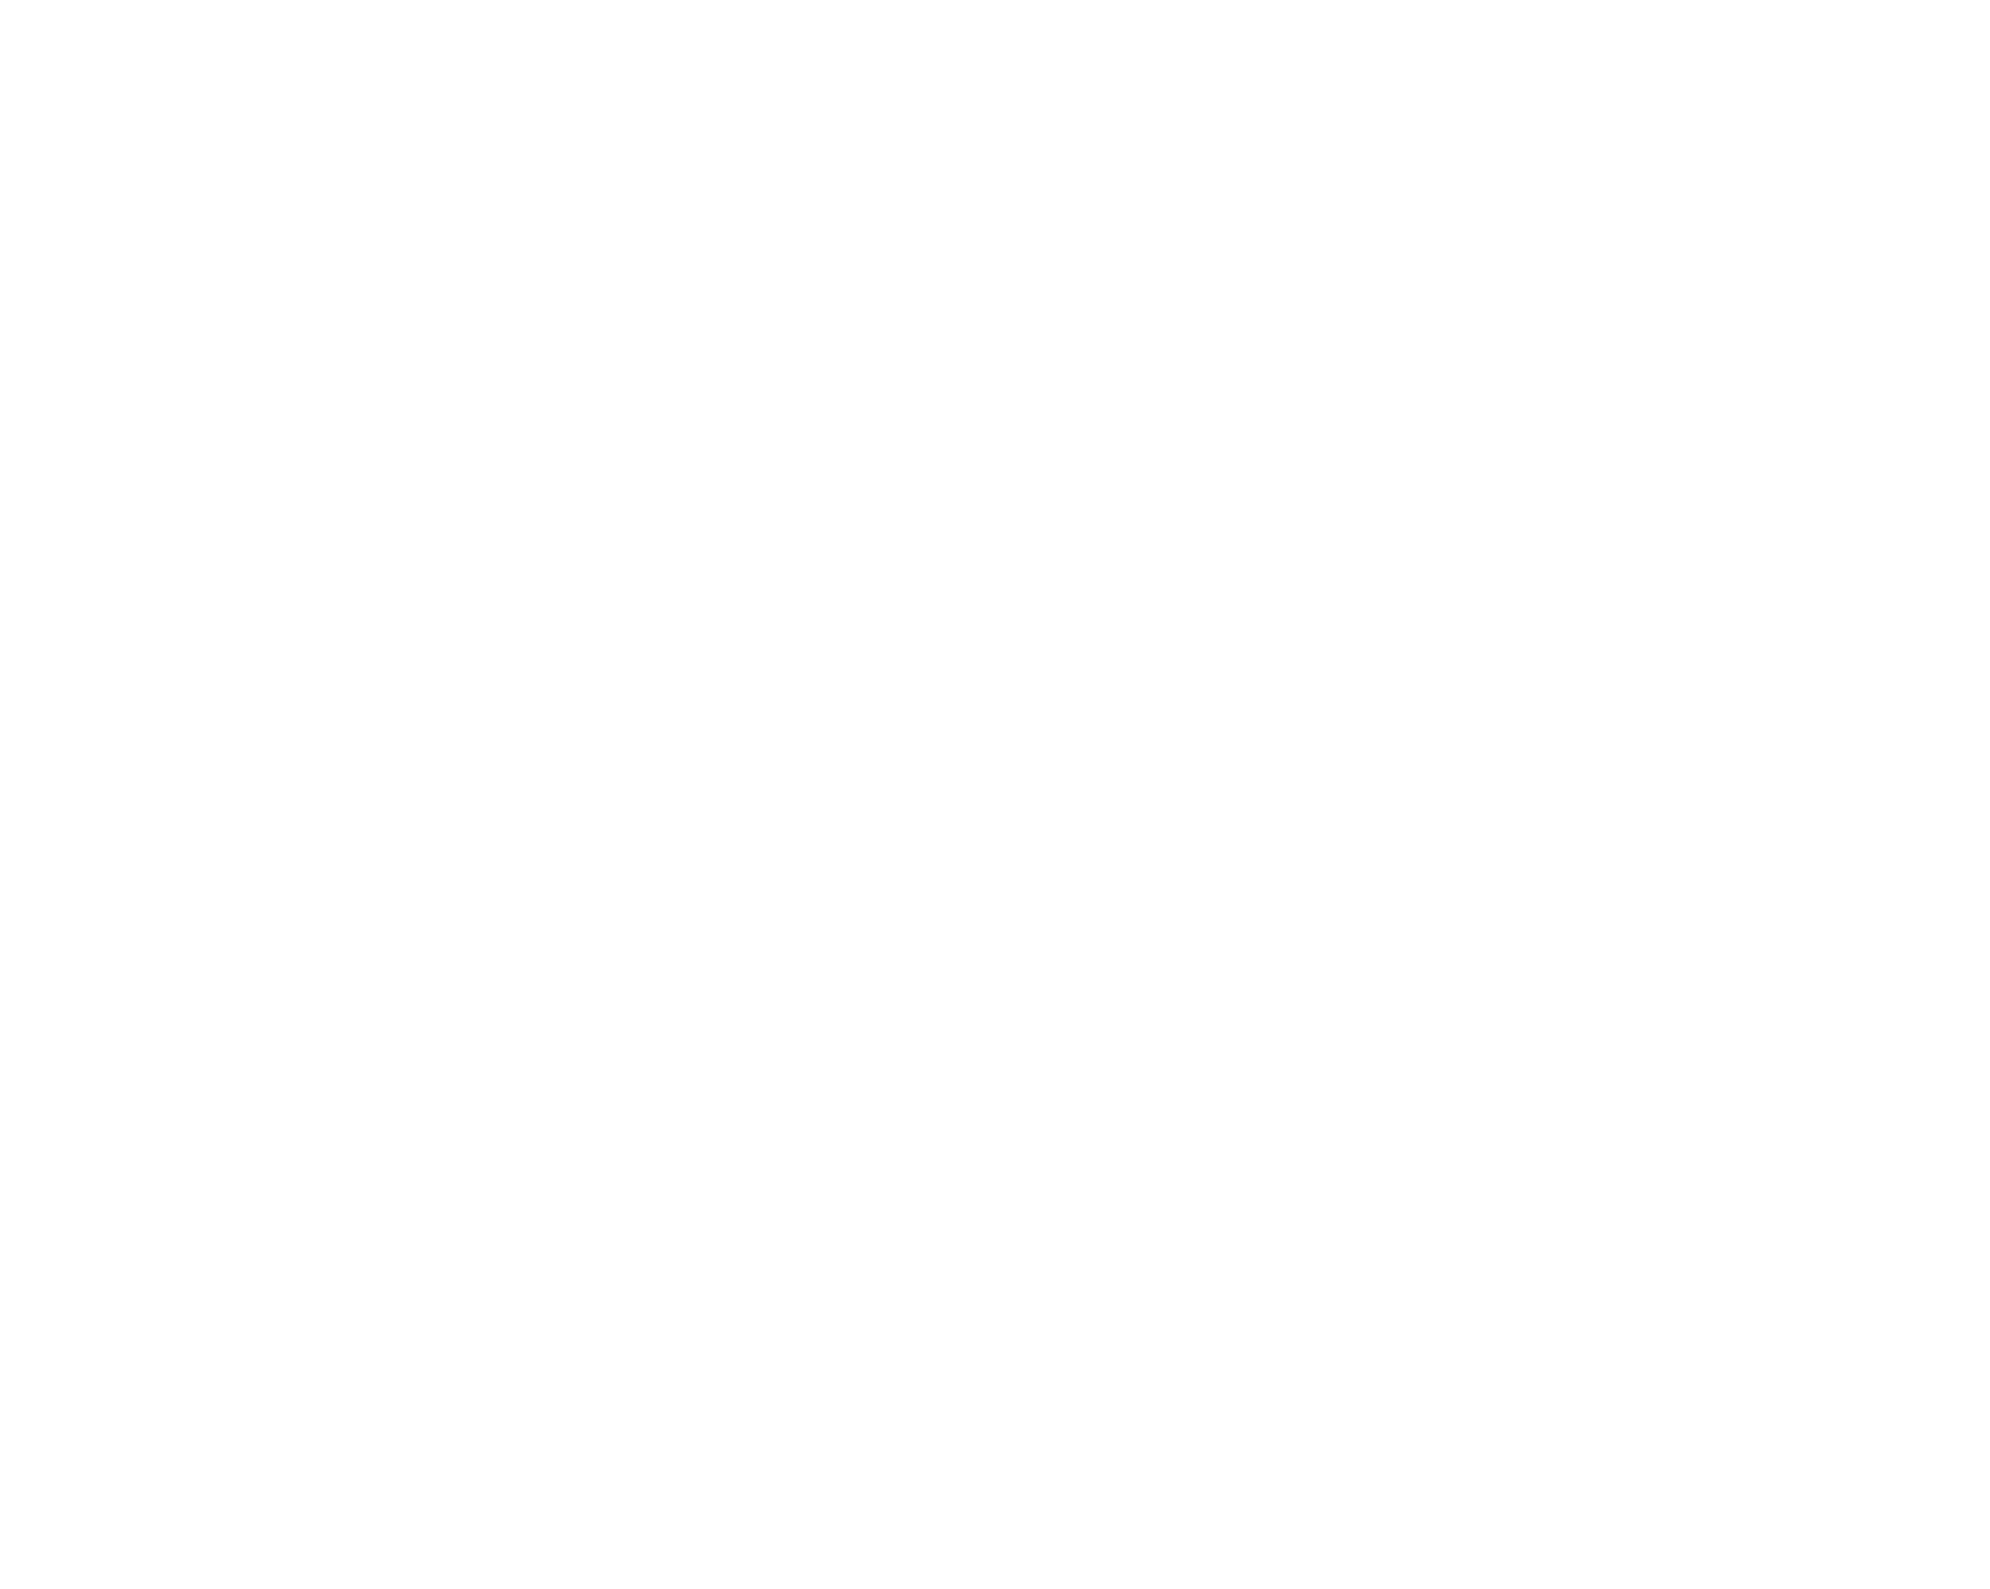

In [47]:

# Define the base directory for images
base_image_dir = r"C:/Users/talake2/Desktop/auto_arborist_cvpr2022_v015/jpegs_streetlevel_genus_idx_label"

# Function to display 20 images in a 4x5 grid
def display_species_images_grid(data, num_images=20):
    # Limit the data to the number of images to display
    data = data.head(num_images)
    
    # Set up a 4x5 grid
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration
    
    for i, (_, row) in enumerate(data.iterrows()):
        # Construct the file path based on the 'type', 'GENUS', and 'IDX' columns
        image_path = os.path.join(base_image_dir, row['type'], row['GENUS'].lower(), 'images', f"{row['IDX']}.jpeg")
        
        # Check if the image file exists
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for cleaner display
            axes[i].set_title(f"{row['genus_name']} - {row['species_name']}")
        else:
            print(f"Image not found for IDX: {row['IDX']}")
            axes[i].axis('off')  # Hide axes if no image is found
    
    # Turn off any extra unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

display_species_images_grid(red_maple_data)


# Images of Species from AutoArborist
# Acer Saccharum (Sugar Maple)

Image not found for IDX: 077b8c98-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077baec6-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d45f6-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d466e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d47c2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d4ad8-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d8976-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077e081a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077e5e78-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077eb6ac-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077eb800-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec994-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f1cd2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f1d4a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f1dc2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f1e30-1f14-11ec-81f2-eb8801c6f8d0
Image no

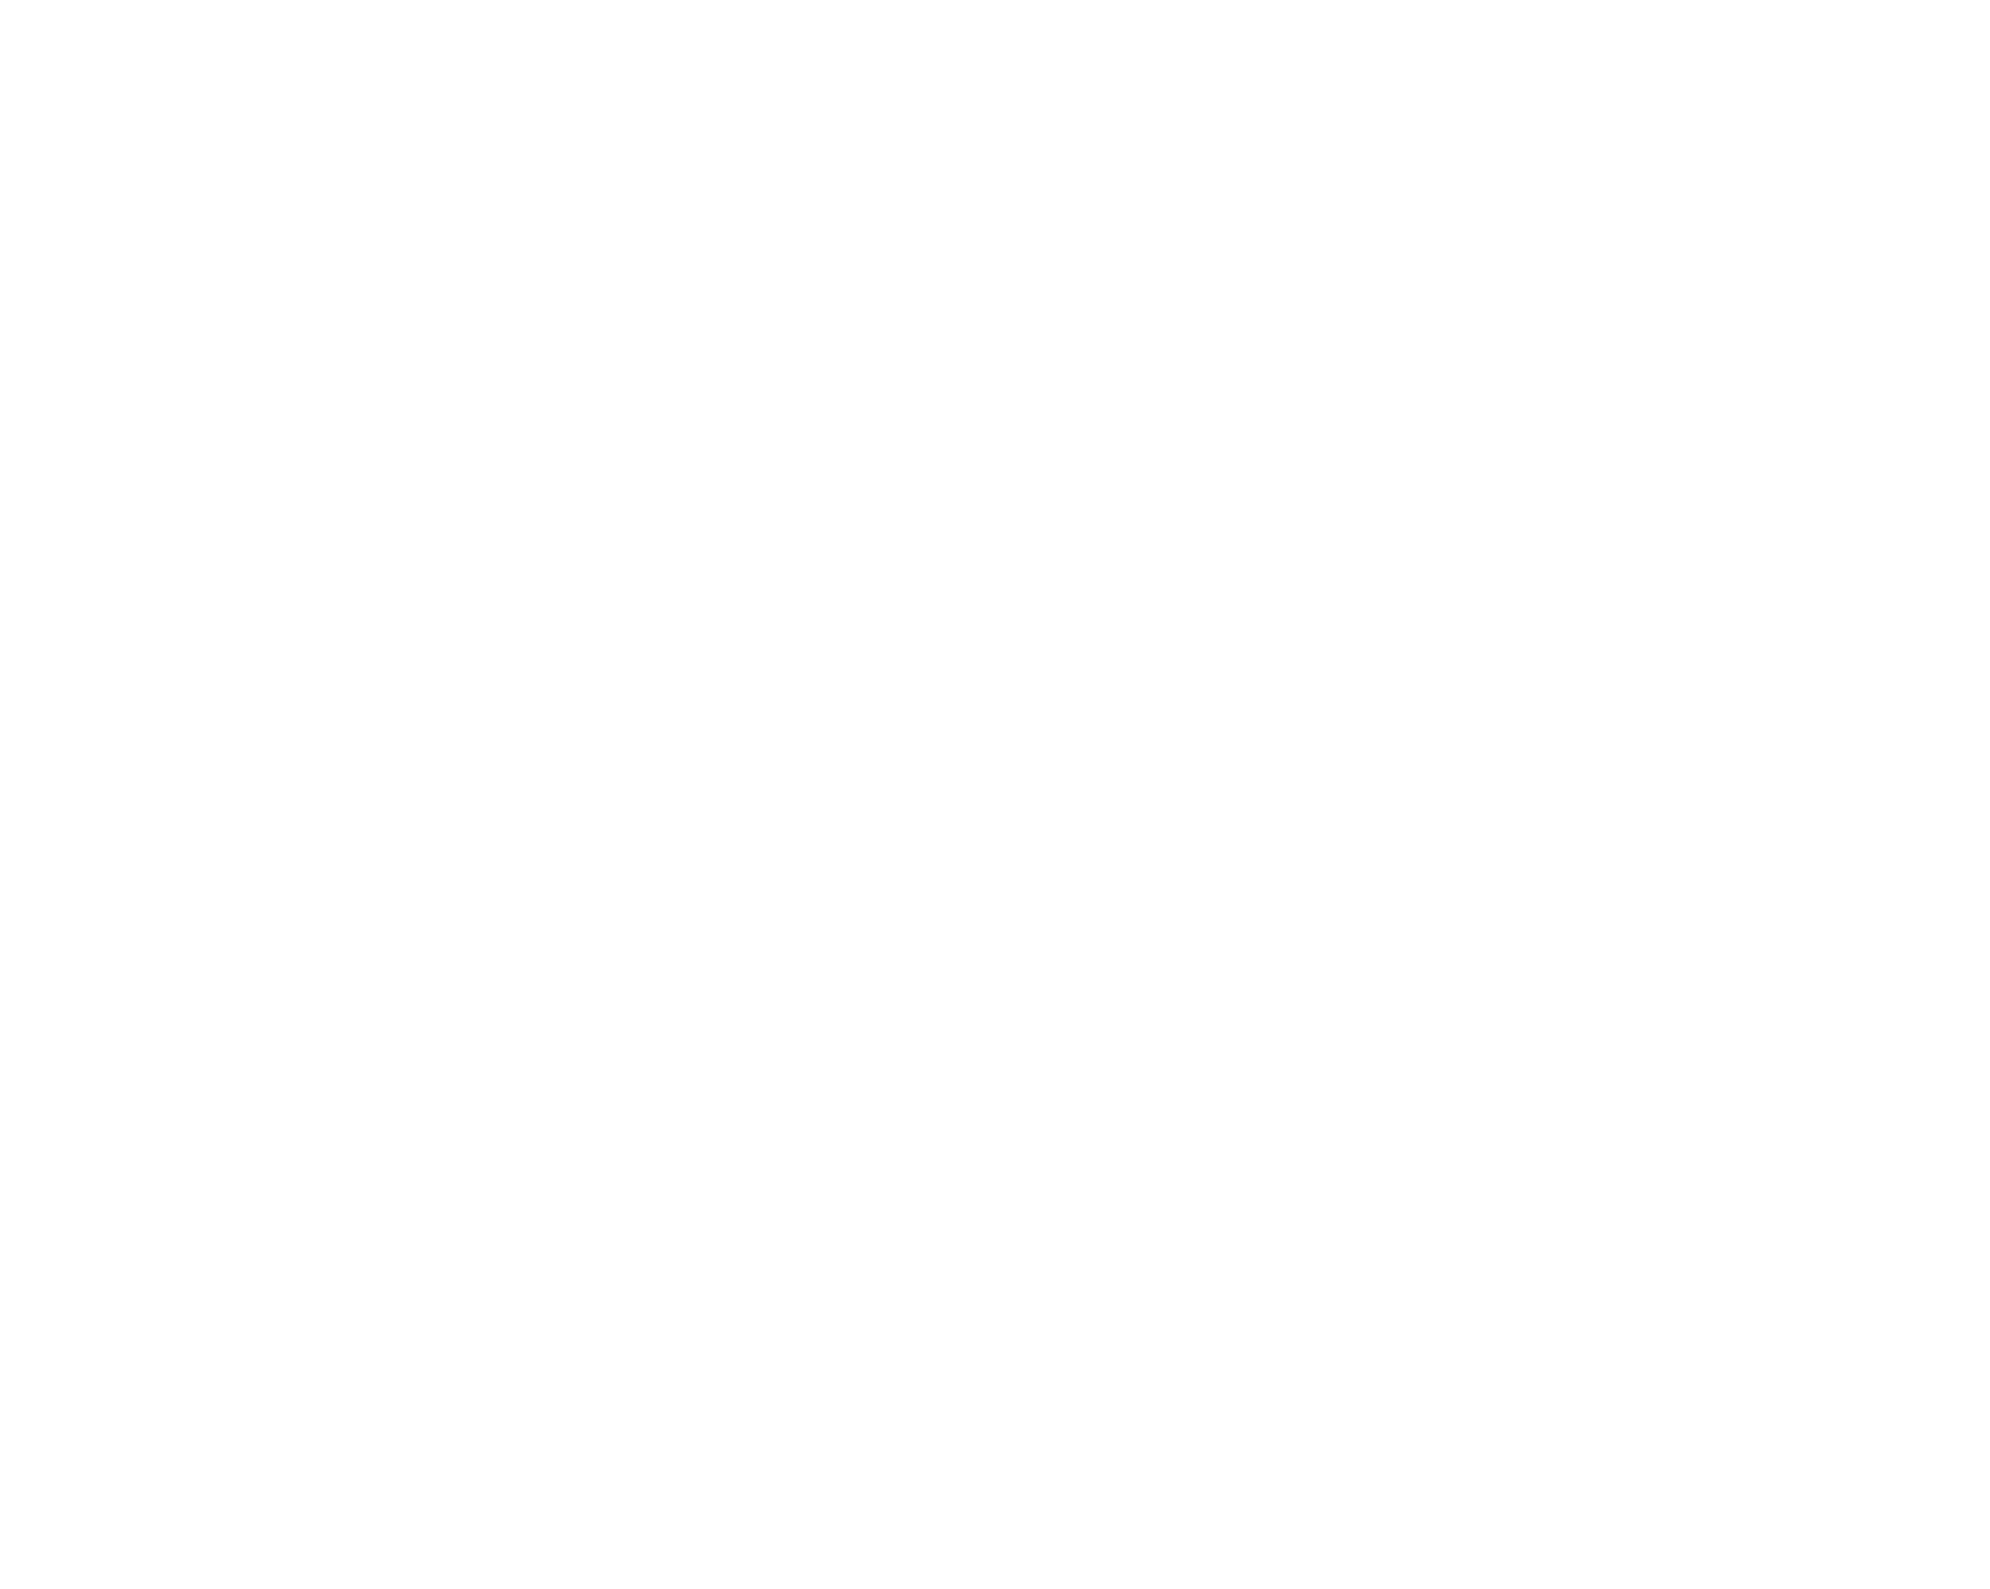

In [48]:
display_species_images_grid(sugar_maple_data)

# Images of Species from AutoArborist
# Acer Saccharinum (Silver Maple)

Image not found for IDX: 077b8a68-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8b1c-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8ef0-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b91f2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b936e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b94ea-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bb3ee-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d5398-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec8b8-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec926-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077eca3e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f248e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078233cc-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07824dc6-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07824e34-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0783aac2-1f14-11ec-81f2-eb8801c6f8d0
Image no

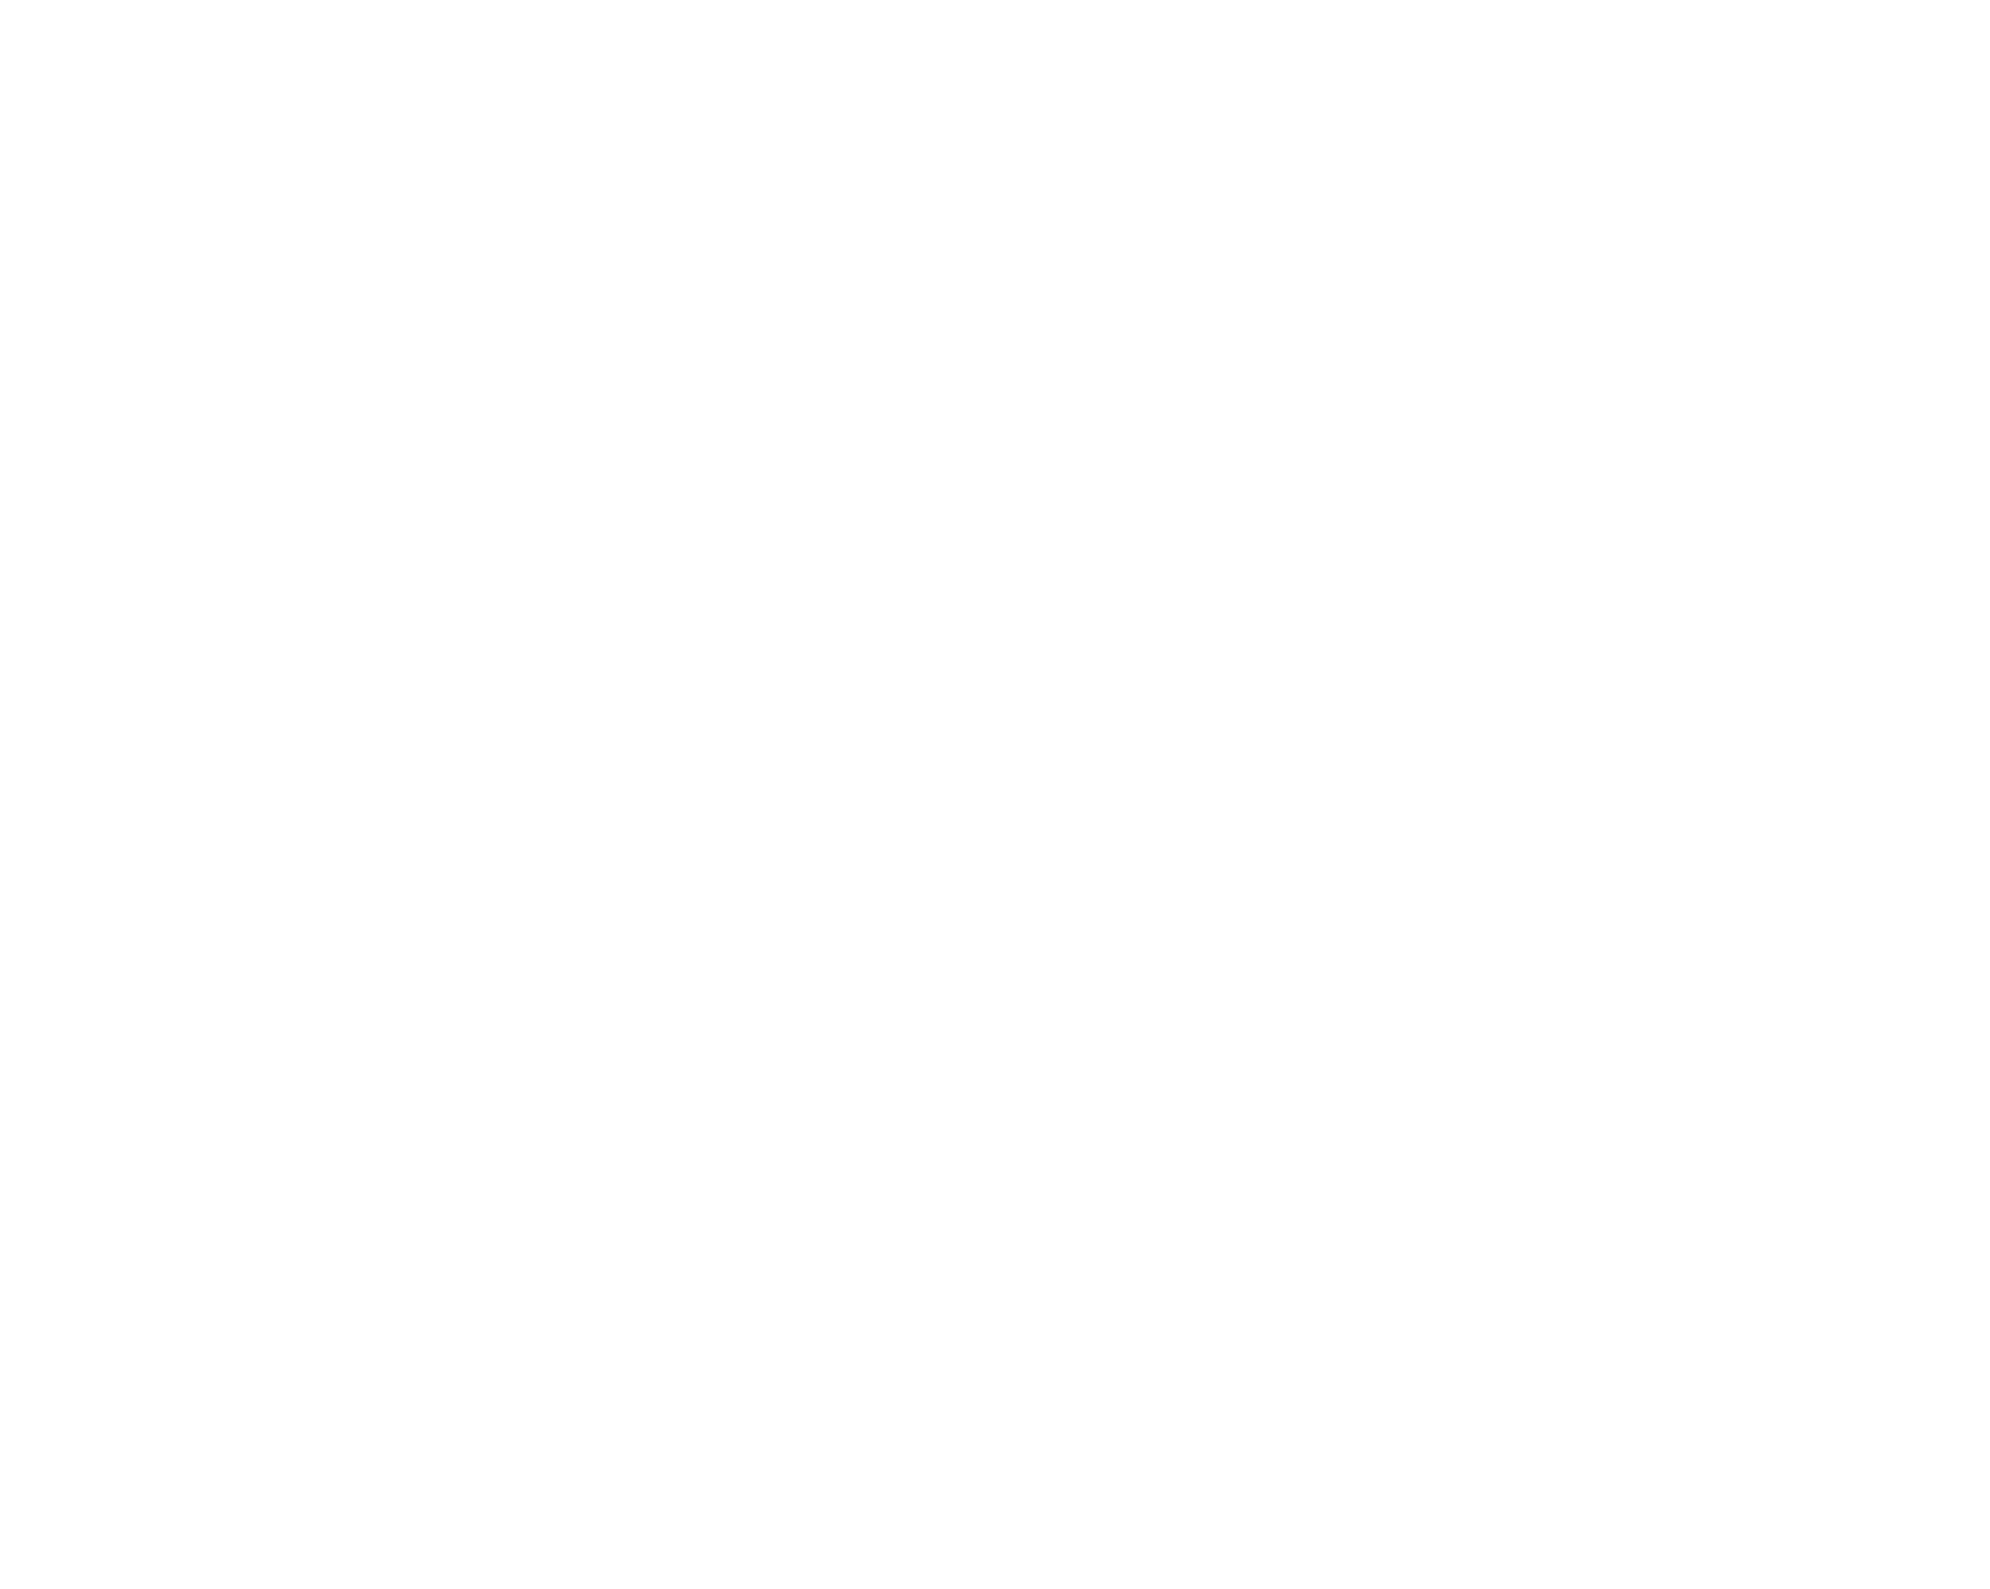

In [49]:
display_species_images_grid(silver_maple_data)

# Images of Species from AutoArborist
# Acer Platanoides (Norway Maple)

Image not found for IDX: 077c8ea4-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077c8f44-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0781acae-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07820e10-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078213ec-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0782145a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078215ae-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07821874-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078218ec-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0784e662-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07903030-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 079031f2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0794b984-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0795c31a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0795c392-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0795c400-1f14-11ec-81f2-eb8801c6f8d0
Image no

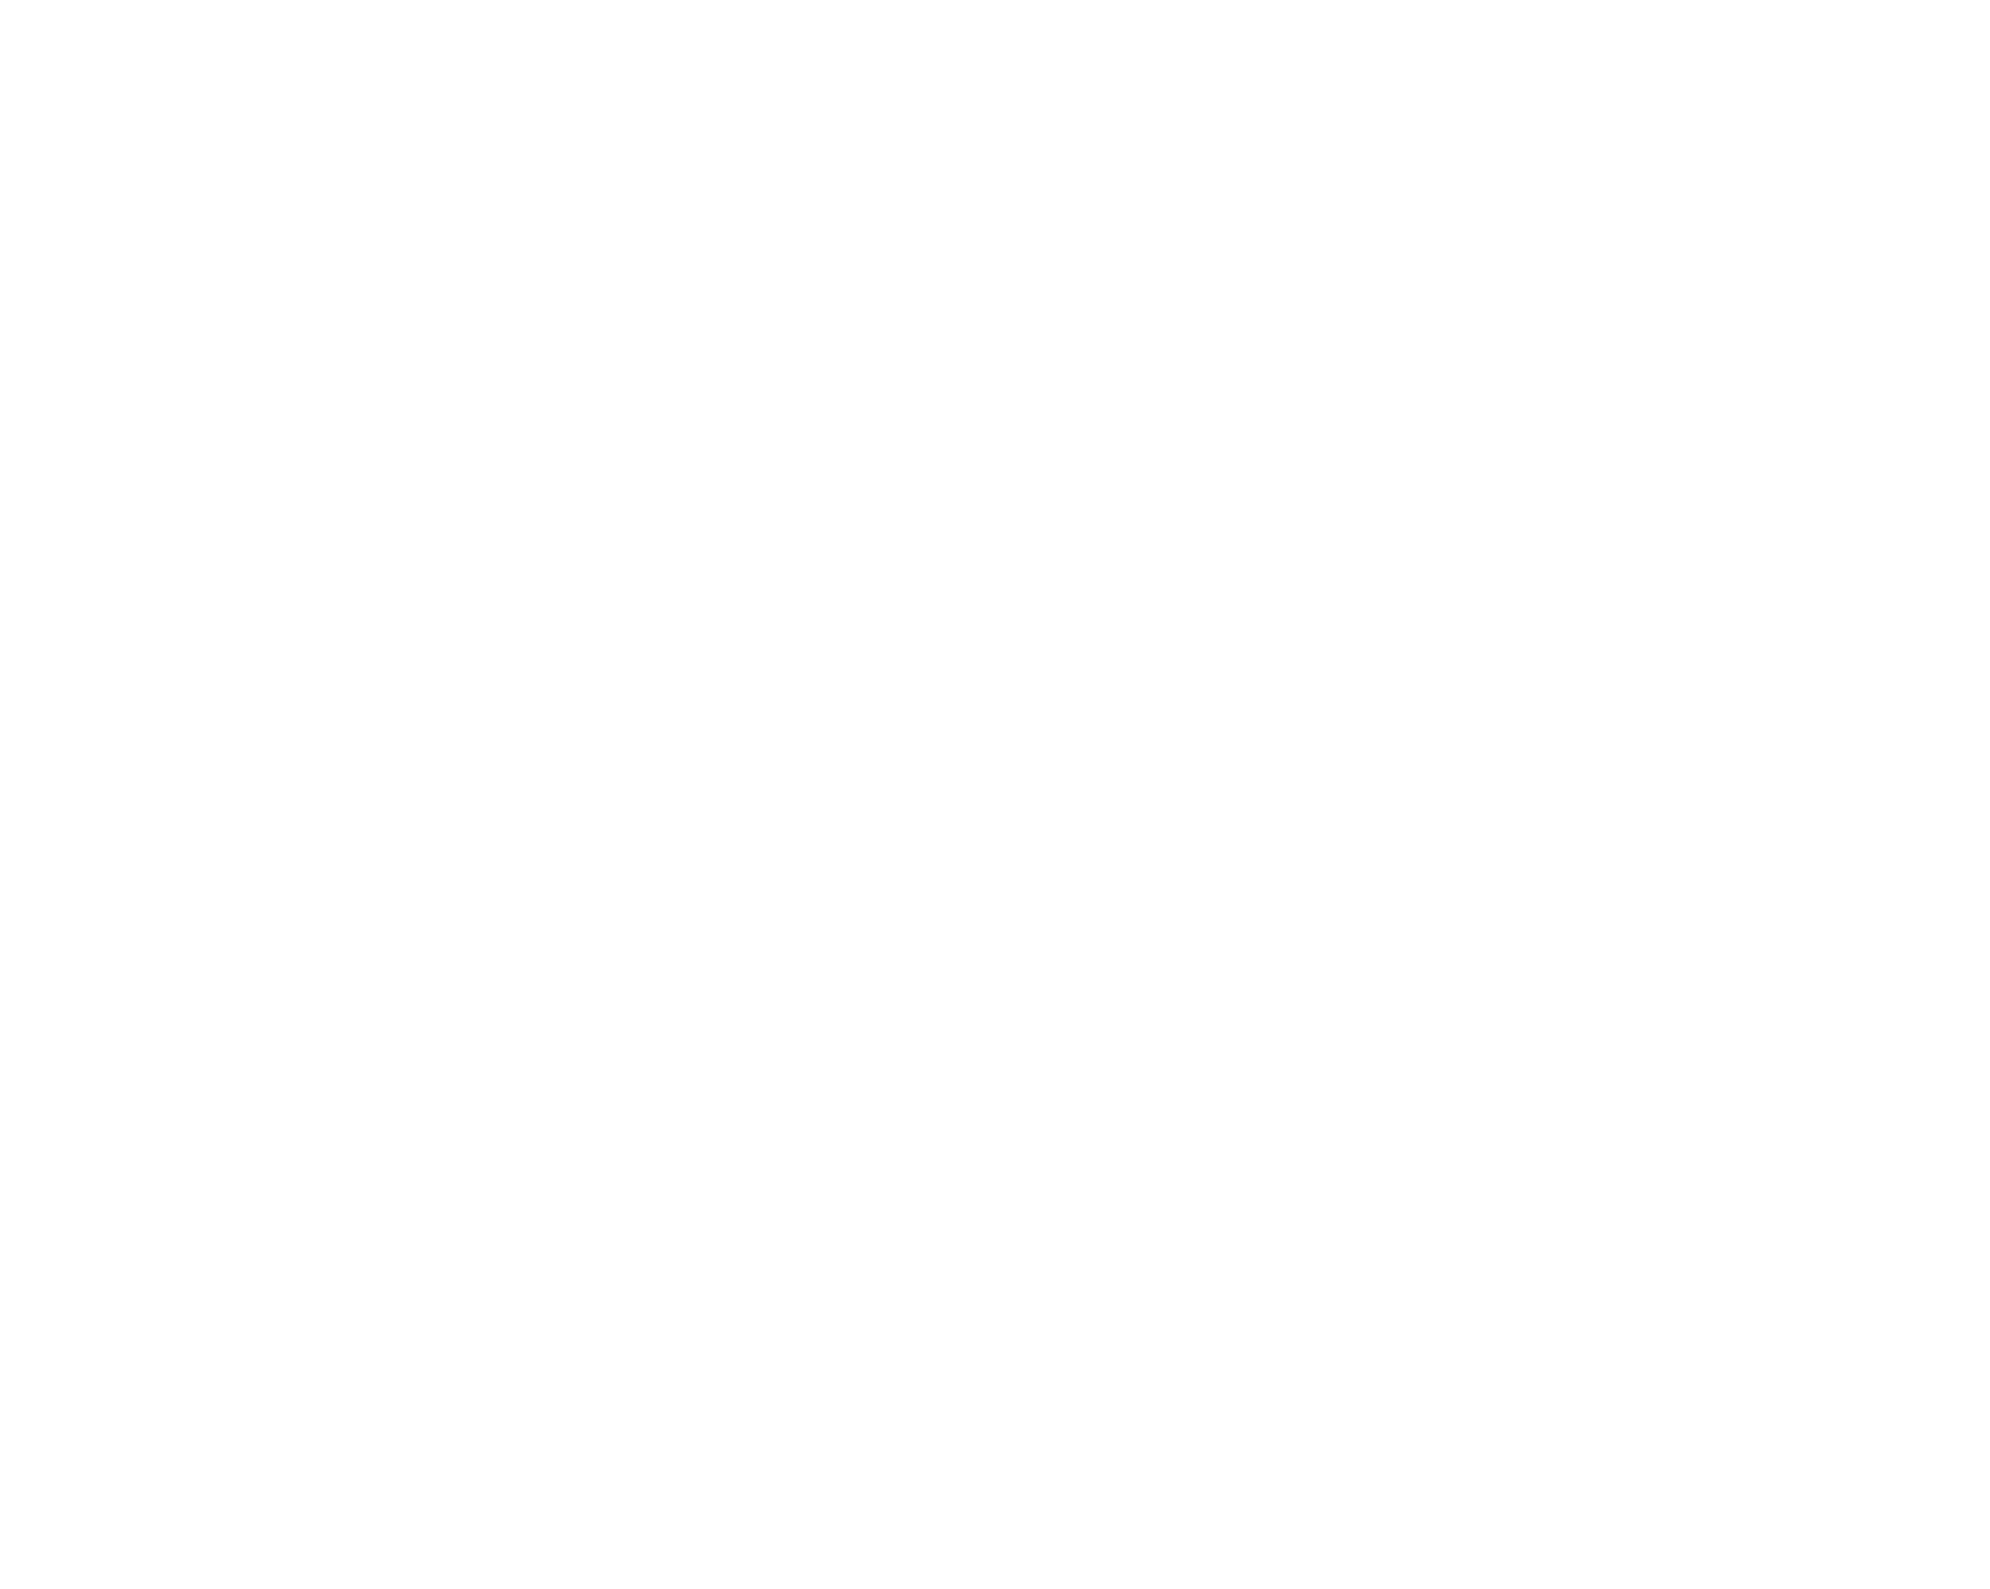

In [50]:
display_species_images_grid(norway_maple_data)

# Images of Species from AutoArborist
# Juglans Nigra (Black Walnut)

Image not found for IDX: 077b9076-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bb858-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0782a5f0-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0784f4d6-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078544ae-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078a7802-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078b35d0-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078d9294-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078d9302-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078dc322-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078f2f32-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078f6470-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078f6952-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07903346-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0790ee3a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0793abde-1f14-11ec-81f2-eb8801c6f8d0
Image no

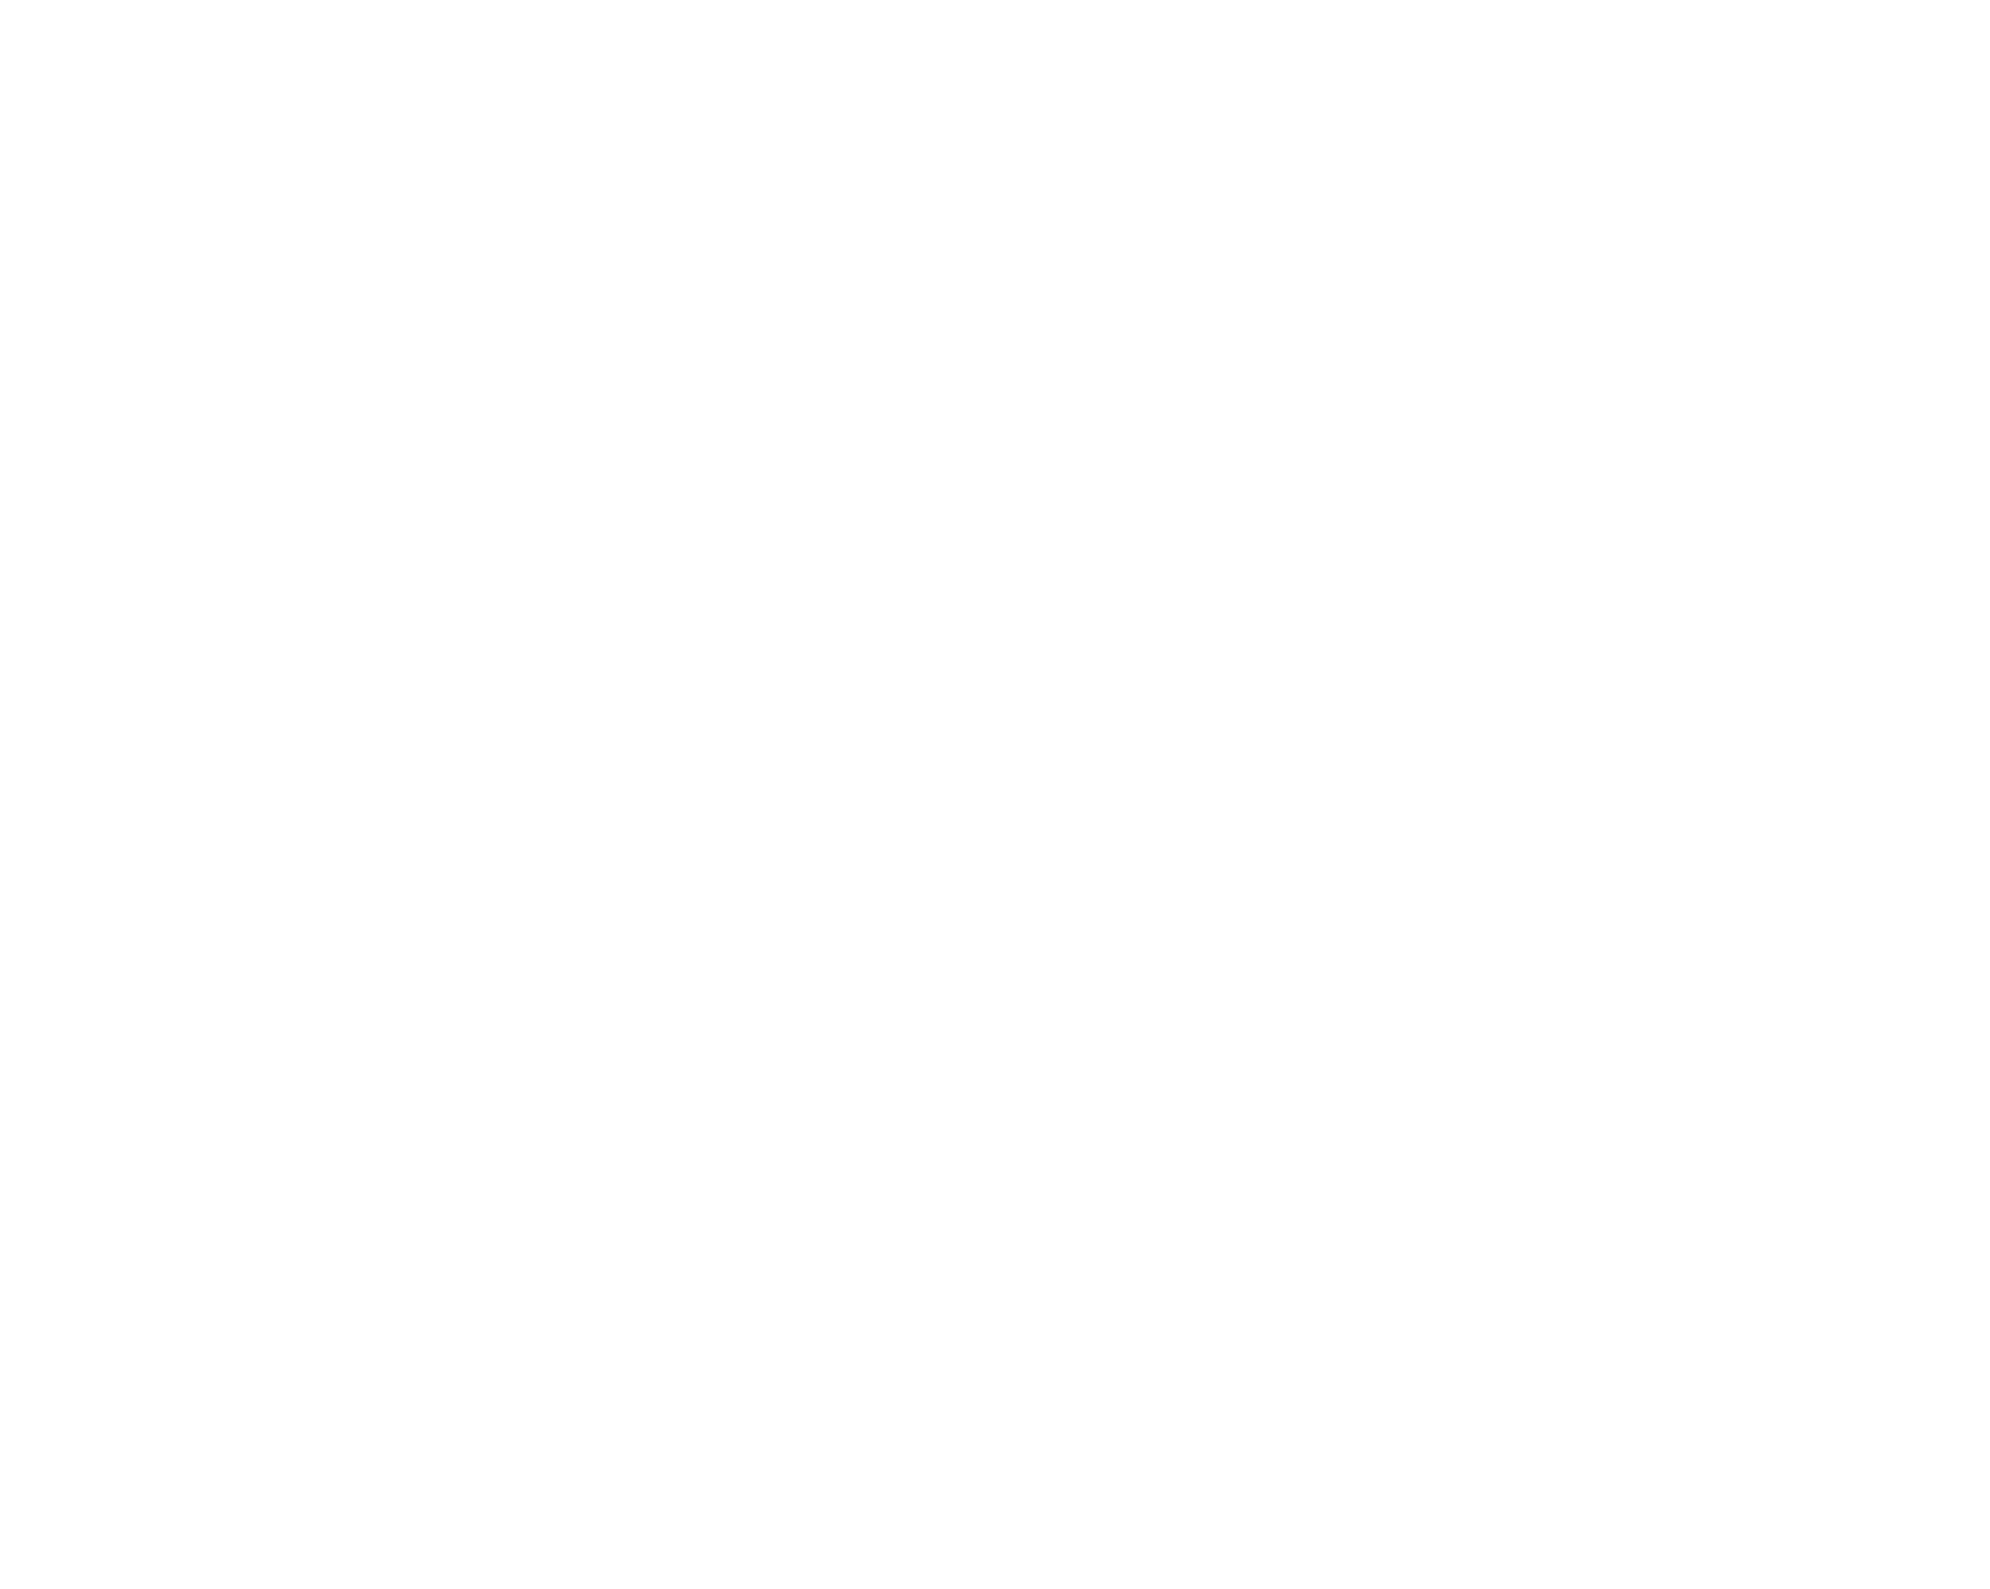

In [51]:
display_species_images_grid(black_walnut_data)

In [52]:
# EOF